In [1]:
from dateutil.parser import parse
import pandas as pd


#import as dataframe
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [2]:
data2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],index_col='date')
data2.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [3]:
data2.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [4]:
ts=data2['value']
ts.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64

In [5]:
print(type(data))
print(type(data2))
print(type(ts))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
#import as series object
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date',squeeze= True)
data.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64

In [7]:
print(type(data))

<class 'pandas.core.series.Series'>


In [8]:
data['1991-07-01']

3.5265910000000003

In [9]:
from datetime import datetime
data[datetime(1991,7,1)]

3.5265910000000003

In [10]:
#specify the entire range
ts['1991-07-01':'1991-12-01']

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
1991-12-01    4.306371
Name: value, dtype: float64

In [11]:
#use ':'if one of indices is at ends
ts[:'1991-12-01']

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
1991-12-01    4.306371
Name: value, dtype: float64

In [12]:
ts['1992']

date
1992-01-01    5.088335
1992-02-01    2.814520
1992-03-01    2.985811
1992-04-01    3.204780
1992-05-01    3.127578
1992-06-01    3.270523
1992-07-01    3.737851
1992-08-01    3.558776
1992-09-01    3.777202
1992-10-01    3.924490
1992-11-01    4.386531
1992-12-01    5.810549
Name: value, dtype: float64

In [13]:
ts1=ts.sort_index()
ts1.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64

In [14]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


In [15]:
print(data.size)

204


In [16]:
print(data.describe())

count    204.000000
mean      10.694430
std        5.956998
min        2.814520
25%        5.844095
50%        9.319345
75%       14.289964
max       29.665356
Name: value, dtype: float64


In [17]:
# Import Data
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

<Figure size 1600x560 with 2 Axes>

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


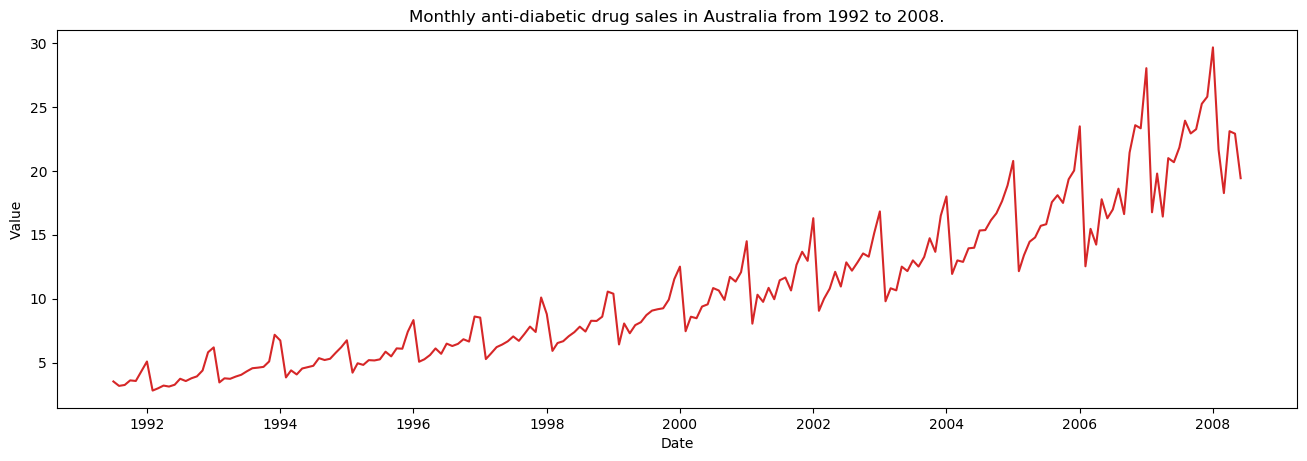

In [18]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 
plt.show()

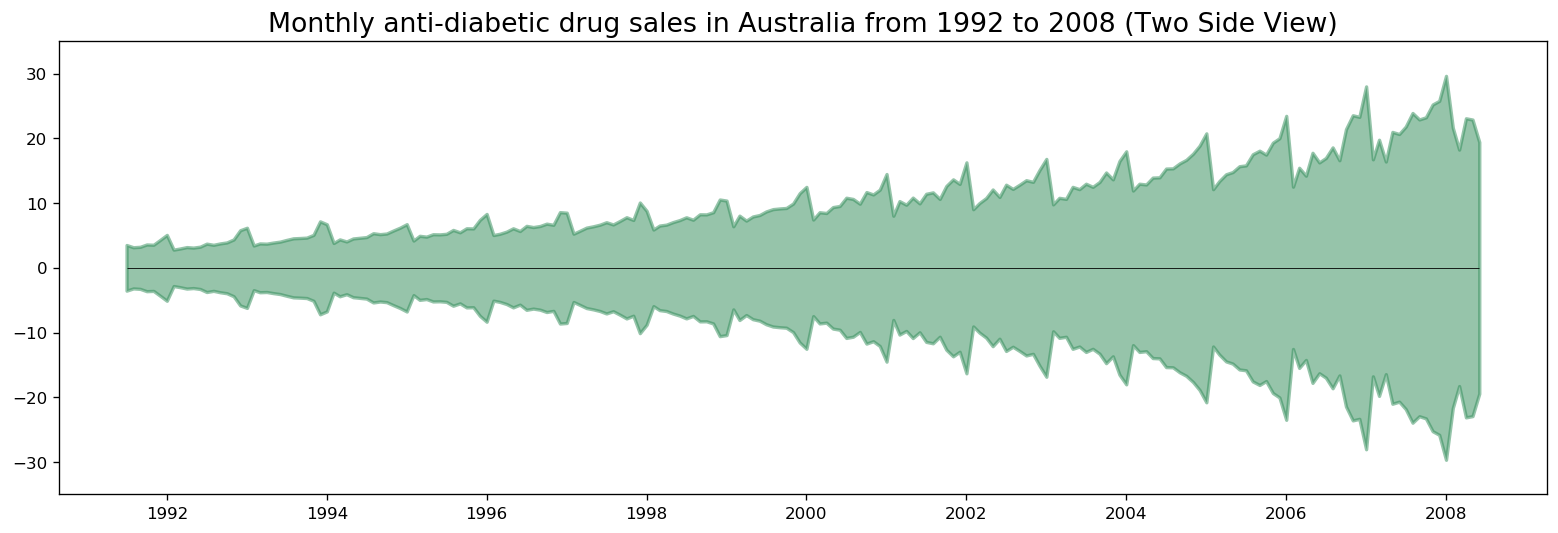

In [19]:
# Import data
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-35, 35)
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

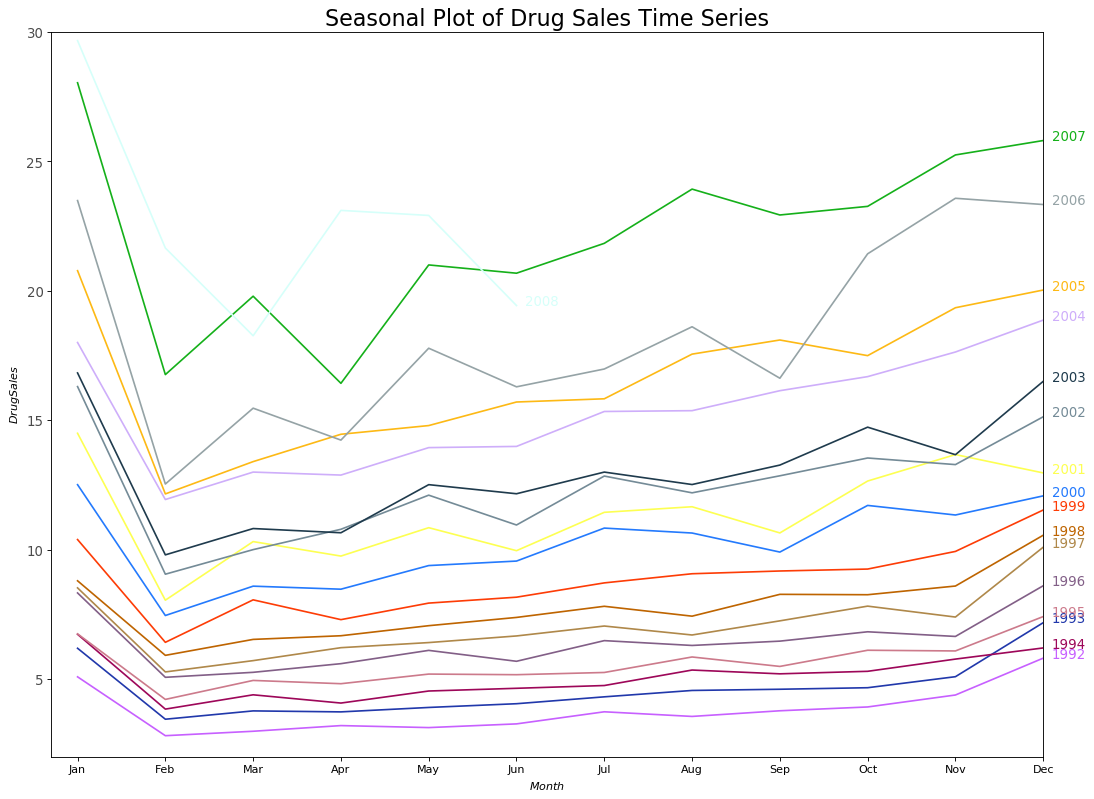

In [20]:
# Import Data
import matplotlib as mpl
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

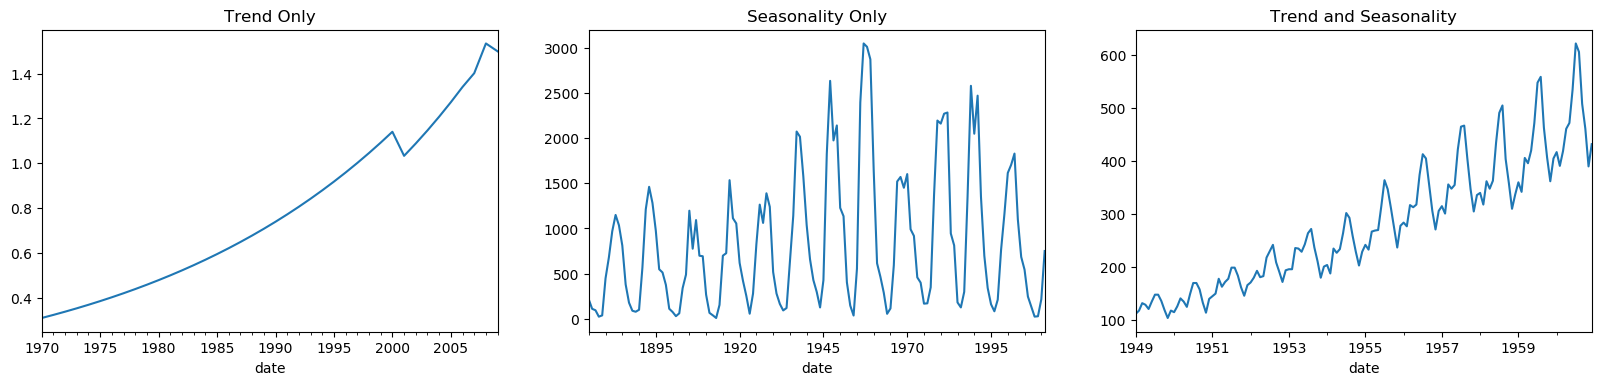

In [21]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])
plt.show()

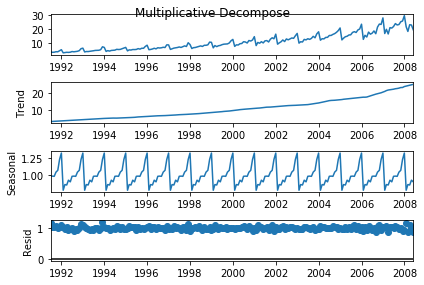

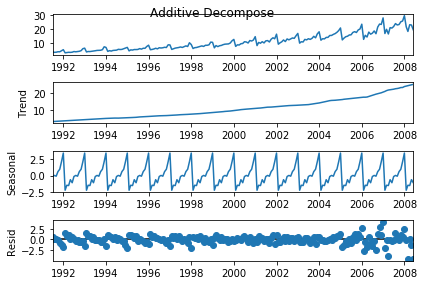

In [22]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
data = read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

#additive decomposition
result_add = seasonal_decompose(data, model='additive',extrapolate_trend='freq')

#multiplicative decomposition
result_mul = seasonal_decompose(data, model='multiplicative',extrapolate_trend='freq')

#plot
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
pyplot.show()

In [23]:
# Extract the Components ----
data_reconst= pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
data_reconst.columns = ['seasonal', 'trend', 'residual', 'actual_values']
data_reconst.head()

,seasonal,trend,residual,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


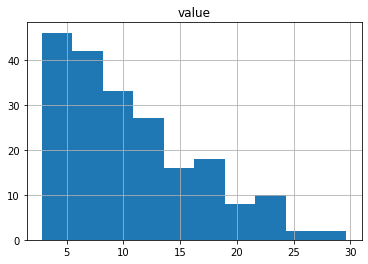

In [24]:
from pandas import read_csv
from matplotlib import pyplot
data = read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
data.hist()
pyplot.show()

In [25]:
from pandas import read_csv
X = read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], squeeze=True)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=6.005927, mean2=15.382932
variance1=3.841176, variance2=23.082408


In [26]:
from statsmodels.tsa.stattools import adfuller
series = read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date', squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


In [27]:
from statsmodels.tsa.stattools import kpss
result = kpss(X, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])


KPSS Statistic: 1.313675
p-value: 0.010000


C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


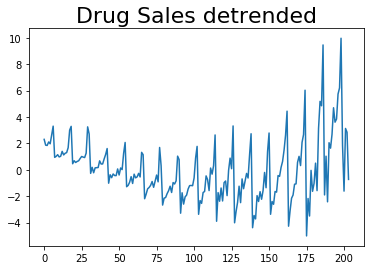

In [28]:
from scipy import signal
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],index_col='date',squeeze=True)
detrended = signal.detrend(df)
plt.plot(detrended)
plt.title('Drug Sales detrended', fontsize=22)
plt.show()

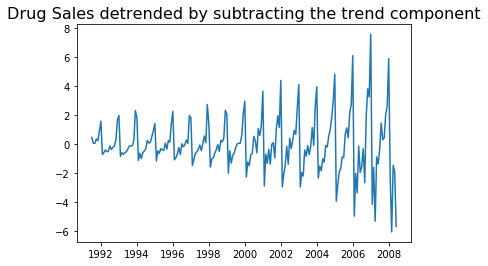

In [29]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date',squeeze=True)
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')
detrended = df - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)
plt.show()

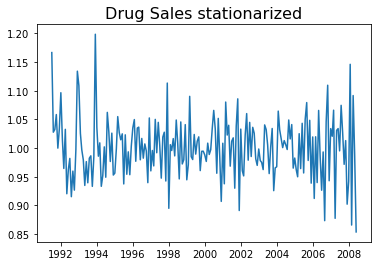

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date',squeeze=True)
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')
detrended = result_mul.resid
plt.plot(detrended)
plt.title('Drug Sales stationarized', fontsize=16)
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date',squeeze=True)
result = adfuller(df.dropna())
print('p-value: %f' % result[1])
data=log(df)

#After 1st difference
data_new=data.diff()
result_new = adfuller(data_new.dropna())
print('p-value after 1st difference: %f' % result_new[1])

p-value: 1.000000
p-value after 1st difference: 0.000181


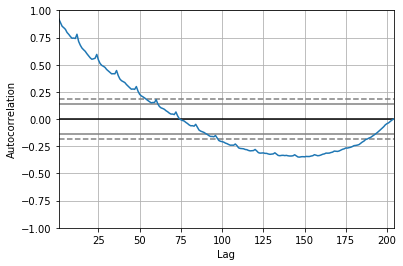

In [32]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',parse_dates=['date'], index_col='date',squeeze=True)

# Draw Plot
autocorrelation_plot(df.tolist())

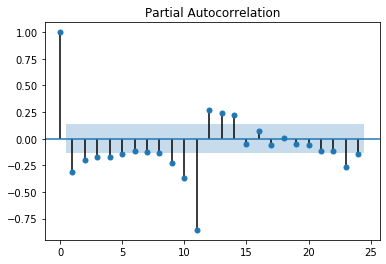

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_new.dropna())

plt.show()

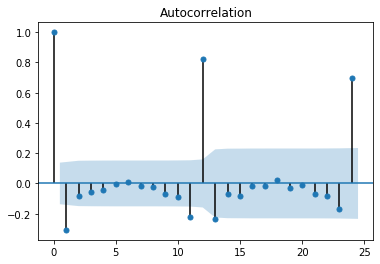

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_new.dropna())

plt.show()

In [53]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -413.181
Method:                       css-mle   S.D. of innovations              1.835
Date:                Sun, 19 Apr 2020   AIC                            838.362
Time:                        01:06:17   BIC                            858.242
Sample:                    08-01-1991   HQIC                           846.405
                         - 06-01-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0966        nan        nan        nan         nan         nan
ar.L1.D.value    -0.6431        nan        nan        nan         nan         nan
ar.L2.D.value     0.3569        nan     

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [50]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=-297.609, BIC=-281.019, Time=0.560 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=353.575, BIC=360.212, Time=0.033 seconds
Fit ARIMA: (1, 0, 0)x(1, 0, 0, 12) (constant=True); AIC=-388.322, BIC=-375.049, Time=0.492 seconds
Near non-invertible roots for order (1, 0, 0)(1, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: (0, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=-5.317, BIC=7.955, Time=0.274 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=False); AIC=918.146, BIC=921.464, Time=0.006 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 12) (constant=True); AIC=-140.648, BIC=-127.375, Time=0.215 seconds
Fit ARIMA: (1, 0, 1)x(1, 0, 1, 12) (constant=True); A

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  72.431
Method:                       css-mle   S.D. of innovations              0.169
Date:                Sun, 19 Apr 2020   AIC                           -136.862
Time:                        00:37:33   BIC                           -123.609
Sample:                    08-01-1991   HQIC                          -131.500
                         - 06-01-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0089      0.008      1.173      0.242      -0.006       0.024
ar.L1.D.value    -0.3692      0.069     -5.358      0.000      -0.504      -0.234
ar.L2.D.value    -0.1969      0.069     

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


NameError: name 'model_fil' is not defined

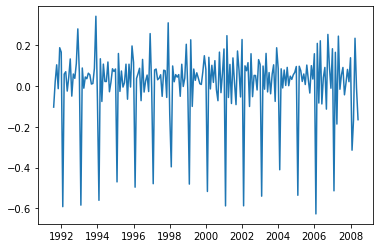

In [71]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
plt.plot(data_new)
plt.plot(model_fi.fittedvalues,color='red')